<a href="https://colab.research.google.com/github/ArifAygun/Advanced-Pandas/blob/main/Project_Definition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

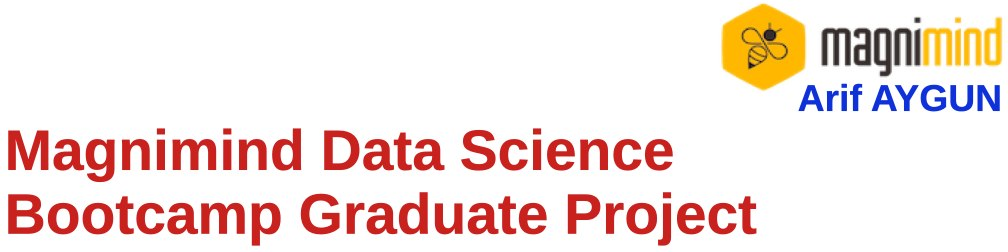

# **Quality Prediction of Iron Ore Mining Flotation Process**

## **Problem Definition**

**Gangue concentrate predict in the reverse cationic flotation:**


Mined ores are mostly mixtures of extractable minerals and nonvaluable material (gangue). Mineral processing (e.g. ore dressing, ore beneficiation) follows mining and prepares the ore for extraction of the valuable metal. A principal step in mineral processing is physical separation of the particles of valuable minerals from the gangue, to produce an enriched portion (concentrate) containing most of the valuable minerals, and a discard (tailing) containing predominantly the gangue.

A separation of minerals by exploiting difference of surface properties (hydrophobicity) is called flotation. **The reverse cationic flotation** is commonly used to separate iron from silica. By adjusting the 'chemistry' of the pulp by adding various chemical reagents, iron minerals remain in the water and create sediment with a high concentration of iron (valuable minerals). At the same time, silica particles (gangue) attach to air bubbles and float to the surface.

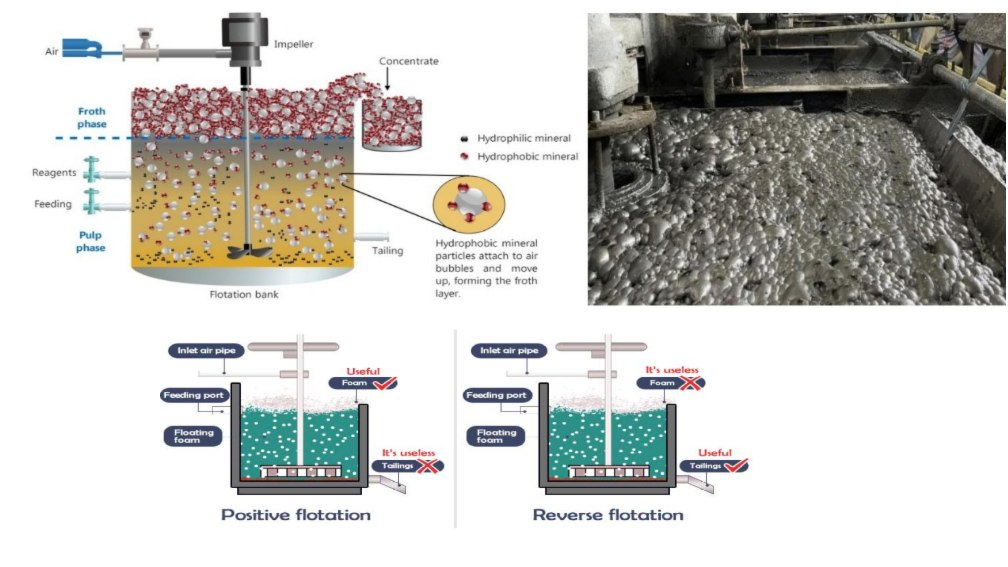

Flotation concentrate is periodically sampled to determine its purity (percentage of gangue). Higher purity in the concentrate is undesirable as it indicates that most valuable minerals had gone into the tailing. Purity measurement is usually done in a lab and can take some time before process engineers can make any adjustments based on the results. A timely investigation of concentrate purity is, therefore, a fundamental aspect for the control and optimization of the flotation process.

This project explores the application of machine learning to predict iron and gangue (silica) concentrate in the flotation output. The prediction will help process engineers assess the purity and take corrective actions in advance.

Source of dataset: https://www.kaggle.com/datasets/edumagalhaes/quality-prediction-in-a-mining-process

## **Data Understanding**

**Data Definitions**

- **Date**: Data collection time. (There is imbalance in measurement of variables)
- **% Iron Feed**: Feed grade of iron-containing ore.
- **% Silica Feed**: Feed grade of silica-containing ore.
- **Starch Flow**: Depressant chemical for Iron(Fe) containing ore measured in m³/h.
- **Amina Flow**: Collector chemical for Silica containing ore measured in m³/h.
- **Ore Pulp Flow**: The amount of pulp flow fed to the flotation columns as the product of the previous process step measured in t/h.
- **Ore Pulp pH**: pH is measured in pH scale.
- **Ore Pulp Density**: The solid percent of ore fed density ranges in kg/cm³
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Air Flow**: Air Flows that goes into the flotation cell measured in Nm³/h.
- **Flotation Column 01, 02, 03, 04, 05, 06, 07 Level**: Froth level in the flotation cell measured in mm.
- **% Iron Concentrate**: Concentrate grade of iron-containing ore in percentage.
- **% Silica Concentrate**: Concentrate grade of silica-containing ore in percentage

**Inspection of the data**

- The first column shows time and date range (march 2017 -  september 2017).
- Measurements are taken every 5-6 hours for the first 2 columns (input - raw material).
- Measurements are taken every 1 hour for the last 2 columns (output - processed material).
- Some columns were sampled every 20 second.
- The second and third columns are quality measures of the iron ore pulp right before it is fed into the flotation plant.
- From Column 4 until column 8 are the most important variables that impact in the ore quality in the end of the process.
- From column 9 until column 22, we can see process data (froth level and air flow inside the flotation columns, which also impact in ore quality).
- The last two columns are the final iron ore pulp quality measurement from the lab.

### **Aim of the Project**

- To predict the percentage of output (iron and silica) concentrate in the mineral processing (reverse cationic flotation) plant

## **Machine Learning Models According to Target Variables (2 Editions)**

### **Percentage of Silica Concentrate Modelling**

https://github.com/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Graduate_Project_Silica(1_Edition).ipynb

https://github.com/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Graduate_Project_Silica(2_Edition).ipynb

### **Percentage of Iron Concentrate Modelling**

https://github.com/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Graduate_Project_Iron(1_Edition).ipynb

https://github.com/ArifAygun/Iron-Ore-Froth-Flotation-Quality-Prediction/blob/main/AA_Graduate_Project_Iron(2_Edition).ipynb

## **Different approaches were applied in the preprocessing:**

## **```Corrections and trimming on Dataset```**

## **```1.Edition```**

There are a lot of unreasonable values in some variables
- Ore Pulp Flow (plant input ore slury) is aproximately 400 t/h.
- When we look the Ore Pulp Flow column most of the values with different decimal figures ("394,57" - "568848") in tons/hour
- Starch Flow and Amina Flow columns have different unbalanced values ("3019,53" - "367383" - "3121" - "1645,3466666667") in m³/hour
- Ore Pulp Density has not any problem ("1,74" - "1,78055")
- Ore Pulp pH must  be in range 0-14. But some values in thousands ("10068" - "9,95376", "9602")
- Flotation Column Air Flow values ("249.214" - "300.2481959288") in Nm³/h
- Flotation Column Level values ("453.942" - "868.6261818182") in mm
- There is no problem in % Iron Concentrate, % Silica Concentrate columns

In [ ]:
columns_to_convert = ['% Iron Feed', '% Silica Feed', '% Iron Concentrate',
                      '% Silica Concentrate', 'Ore Pulp Density']

for column in columns_to_convert:
    flotation[column] = flotation[column].str.replace(',', '.').astype(float).round(2)

In [ ]:
columns_to_update = ["Starch Flow", "Amina Flow", "Ore Pulp Flow"]

flotation[columns_to_update] = (flotation[columns_to_update].replace(",", "", regex=True)
                               .apply(lambda x: x.str[:3] + "." + x.str[3:])
                               .astype(float).round(3))

In [ ]:
flotation["Ore Pulp pH"] = (flotation["Ore Pulp pH"].str.replace(",", ".", regex=True)
                           .apply(lambda x: float(x[:2] + x[2:].replace(".", ""))
                           if "," in x else float(x)).round(2))

In [ ]:
columns_to_update = ["Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow", "Flotation Column 03 Air Flow",
                     "Flotation Column 04 Air Flow", "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                     "Flotation Column 07 Air Flow"]

for column in columns_to_update:
    flotation[column] = flotation[column].str.replace(",", "")
    flotation[column] = flotation[column].apply(lambda x: "{:d}.{:s}".format(int(x[:3]), x[3:]) if len(x) > 3 else np.nan)
    flotation[column] = flotation[column].astype('float64').round(3)

In [ ]:
columns_to_update = ["Flotation Column 01 Level", "Flotation Column 02 Level", "Flotation Column 03 Level",
                     "Flotation Column 04 Level", "Flotation Column 05 Level", "Flotation Column 06 Level",
                     "Flotation Column 07 Level"]

for column in columns_to_update:
    flotation[column] = flotation[column].str.replace(",", "")
    flotation[column] = flotation[column].apply(lambda x: "{:d}.{:s}".format(int(x[:3]), x[3:]) if len(x) > 3 else np.nan)
    flotation[column] = flotation[column].astype('float64').round(3)

In [ ]:
flotation['Airflow'] = flotation[["Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow",
                                  "Flotation Column 03 Air Flow", "Flotation Column 04 Air Flow",
                                  "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                                  "Flotation Column 07 Air Flow"]].mean(axis=1).round(3)

flotation.drop(["Flotation Column 01 Air Flow", "Flotation Column 02 Air Flow",
                "Flotation Column 03 Air Flow", "Flotation Column 04 Air Flow",
                "Flotation Column 05 Air Flow", "Flotation Column 06 Air Flow",
                "Flotation Column 07 Air Flow"], axis=1, inplace=True)

In [ ]:
flotation['Level'] = flotation[["Flotation Column 01 Level", "Flotation Column 02 Level",
                                "Flotation Column 03 Level", "Flotation Column 04 Level",
                                "Flotation Column 05 Level", "Flotation Column 06 Level",
                                "Flotation Column 07 Level"]].mean(axis=1).round(3)

flotation.drop(["Flotation Column 01 Level", "Flotation Column 02 Level",
                "Flotation Column 03 Level", "Flotation Column 04 Level",
                "Flotation Column 05 Level", "Flotation Column 06 Level",
                "Flotation Column 07 Level"], axis=1, inplace=True)

## **```2.Edition```**

The dataset misses data packages of a couple of days. This was probably caused by a production shutdown. In order to rule out any influences from potentially corrupted data, it will be trimmed the data earlier of the restart of production ("2017-03-29 12:00:00"). We can also see that the quality of the products does not seem to follow a clear temporal dependency.

In [ ]:
# Convert 'date' column to datetime type
flotation['date'] = pd.to_datetime(flotation['date'])
# Set 'date' column as the index
flotation.set_index('date', inplace=True)

sep_date = "2017-03-29 12:00:00"
# Trim the dataset by filtering rows after the specified sep_date
flotation = flotation[flotation.index >= sep_date]

## **```Grouping Rows With Hourly Frequency```**

## **```1.Edition```**

The importance of considering plant data as a holistic entity was emphasized in order to gain a comprehensive understanding. To achieve this, a loop-based analysis methodology was employed. Each row of data was treated as an individual iteration, representing a complete cycle of feeding 100 tons of ore to the plant, enriching it, and concluding the process. For the purpose of this study, each cycle was set at a duration of one hour. Consequently, a photograph of the plant was captured at hourly intervals and subjected to analysis. It is worth noting that if a more frequent and regular data collection scheme were in place, such as cycles occurring every minute, it would yield a larger dataset suitable for machine learning applications.

In [ ]:
flotation['date'] = pd.to_datetime(flotation['date'])
#grouping the data according to the hours and get their average values.
flotation_grouped = flotation.groupby(pd.Grouper(key='date',freq='H')).mean()
flotation_grouped.reset_index(inplace = True)

The grouping process has a number of advantages and disadvantages.

**Advantages:**
Each analysis will be able to do each data cycle on an hourly frequency.
Date column can be dropped. The number of columns fell to 23.
The number of rows fell to 4097 from 737453. Every rows means calculations on computer.

**Disadvantage:** The number of rows fell to 4097 from 737453. The more rows we have for machine learning, the better results we get. This large data loss will adversely affect our estimation results.

## **```2.Edition```**

Based on the dataset documentation, it is observed that certain columns are sampled at different frequencies, with some features being recorded every 20 seconds while others are sampled hourly. For example, the feature 'Ore Pulp Flow' exhibits continuous changes throughout the process, while ('% Iron Feed' - '% Silica Feed') and ('% Iron Concentrate' - '% Silica Concentrate') are only recorded once every hour. It is important to consider the nature of these sampling frequencies as it impacts the representation of the data.

Treating each row as an individual observation may not accurately reflect the reality of the process, particularly when including less frequently sampled features that remain constant over the course of an hour. Simply using all samples for training a model fails to capture the true dynamics of the system.

One approach is to aggregate the data by calculating the mean of the 20-second samples for each hour, resulting in a new dataframe that represents the hourly average values. This reduction in data size, by a factor of 180, allows for a more meaningful representation of the hourly trends. However, solely relying on the mean values might lead to the loss of important information contained in the 20-second samples.

To mitigate the loss of information from the 20-second samples, it is beneficial to consider their variations within each hour. One way to incorporate this variability is by calculating additional statistics such as the standard deviation of the meaned columns. By including these measures of variation, we can capture the dynamics and fluctuations within the hourly intervals, providing a more comprehensive representation of the process.

Taking into account the varying sampling frequencies in the dataset and considering the trade-off between data size reduction and information loss, aggregating the data to hourly means along with measures of variability can provide a more meaningful representation of the process dynamics for further analysis and modeling.

In [ ]:
# Convert the index to datetime
flotation_mean.index = pd.to_datetime(flotation_mean.index)
# Group the DataFrame by hourly intervals and calculate the mean
mean_grpby = flotation_mean.resample('1H').mean()
# Group the DataFrame by hourly intervals and calculate the standard deviation
std_grpby = flotation_mean.resample('1H').std()
# Remove columns with zero variance (null columns)
std_grpby = std_grpby.loc[:, (std_grpby != 0).any()]
# Add prefix 'std_' to the column names
std_grpby = std_grpby.add_prefix('std_')
# Merge the mean and standard deviation DataFrames on the index
flotation_merge = pd.concat([mean_grpby, std_grpby], axis=1)
# Assign the merged DataFrame back to 'flotation'
flotation = flotation_merge

Note: The purpose of removing columns with zero variance is to eliminate features that have constant values throughout the dataset. These columns do not contribute any useful information for modeling and can potentially cause issues during training. By removing them, we can reduce the dimensionality of the dataset and improve the model's performance.

##**```Comparing 2 Editions Results```**



### **Percentage of Silica Concentrate Modelling**

Comparing the conclusions of the two editions:

1st Edition:

- The best performing models for predicting the percentage of silica concentrate were Random Forest and LGBM, followed closely by XGBoost.
- The LGBM model consistently outperformed other models during cross-validation, indicating better overall performance in minimizing prediction errors.
- LGBM demonstrated faster execution times compared to Random Forest, making it a more favorable choice in terms of computational efficiency.
- Feature importance analysis highlighted the importance of variables such as 'silica_conc', 'amina_flow', 'pulp_density', 'silica_feed', and 'airflow' in predicting the silica concentrate.
- Redundant features within clusters were identified, suggesting the possibility of reducing colinearity.

2nd Edition:

- Random Forest and LGBM models achieved the best results among the tested models for predicting the percentage of silica concentrate.
- The LGBM model, with selected hyperparameters, demonstrated the best performance in terms of MSE, MAE, and R^2, outperforming other models.
- Feature importance analysis identified 'level', 'airflow', 'amina_flow', 'iron_feed', and 'pulp_pH' as the top 5 most important features for predicting the silica concentrate.
- The combination of model evaluation and feature importance analysis suggested the significance of these features in optimizing the flotation process.

While both editions highlight the importance of Random Forest and LGBM models for predicting the silica concentrate, there are some differences in the specific findings. The first edition emphasizes computational efficiency and identifies additional important features such as 'std_level6' and 'std_starch_flow'. On the other hand, the second edition focuses on the LGBM model's superior performance, specifically highlighting 'level', 'airflow', 'iron_feed', and 'pulp_pH' as important features.

### **Percentage of Iron Concentrate Modelling**

Comparing the two editions, there are some differences in the presentation and wording, but the overall conclusions are similar. Both editions highlight the strong performance of LGBM, Random Forest, and XGBoost models for predicting the Percentage of Iron Concentrate. They consistently exhibit lower error metrics, higher R^2 scores, and demonstrate better accuracy compared to other models.

The 10-fold cross-validation results and the grid search analysis support the superior performance of LGBMRegressor over RandomForestRegressor. It achieves lower error metrics, higher R^2 scores, and requires less time for computations.

Both editions emphasize the importance of certain features such as Level, Airflow, Amina Flow, Iron Feed, and Pulp pH in predicting the Percentage of Iron Concentrate. They provide insights into the factors that have the most significant impact on the target variable and can guide process optimization.

Additionally, the identification of redundant features through hierarchical clustering is mentioned in both editions, highlighting the potential colinearity between certain variables and the need for feature selection to address multicollinearity.

In summary, both editions reach similar conclusions regarding the favorable performance of LGBM, Random Forest, and XGBoost models, the superiority of LGBMRegressor over RandomForestRegressor, the importance of specific features, and the potential redundancy in the dataset. The differences lie in the presentation and wording of the conclusions but do not significantly alter the overall findings.